In [12]:
from bs4 import BeautifulSoup
import pandas as  pd
import requests


In [13]:
all_data = []
Base_url = "https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/"
next_page = 1
total_pages = 86

for idx in range(3):
    print( Base_url + str(next_page) )
    next_page +=1

https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/1
https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/2
https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/3


In [14]:
r = requests.get('https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/1')
list_houses = BeautifulSoup( r.content, 'html5lib')
list_houses

<!DOCTYPE html>
<html lang="pt-BR"><head id="Head">
<!--*********************************************-->
<!-- DNN Platform - http://www.dnnsoftware.com   -->
<!-- Copyright (c) 2002-2016, by DNN Corporation -->
<!--*********************************************-->
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-WP2RZNB');</script>
<!-- End Google Tag Manager -->
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-111524963-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-111524963-1');
</script

In [15]:
r = requests.get('https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/1')
soup = BeautifulSoup( r.content, 'html5lib')

list_houses = soup.select('div[class*=listagem__imovel]')

len(list_houses)
        

8

In [16]:
list_houses

[<div class="listagem__imovel casagrid__col--3 casagrid__col--lg-4 casagrid__col--md-6 casagrid__col--sm-12">
 	<a class="listagem__link" href="tabFichaL/fic/1977526/ref/-Loja-Joinville-Iririu" itemprop="url">
 		<div class="listagem__img-box foto1977526">
 			<img alt="Loja-Joinville-Iririu-08799.003" class="listagem__img" data-object-fit="contain" itemprop="image" src="https://www.anagelocacao.com.br/indicadordeimoveis/imobiliarias/1930/fotos/medio480x360/1485501930/26579801930.jpg" srcset="https://www.anagelocacao.com.br/indicadordeimoveis/imobiliarias/1930/fotos/medio220x165/1485501930/26579801930.jpg 320w, https://www.anagelocacao.com.br/indicadordeimoveis/imobiliarias/1930/fotos/medio480x360/1485501930/26579801930.jpg 768w"/>
 			<div class=""></div>
                        
 		</div>
 		<div class="listagem__descricao" itemprop="description">
 			<div class="listagem__infos-box">
 				<div class="listagem__item-info"><span class="ui__text--black">625</span> M² TOTAL</div>
 				<

In [17]:
def parse_data( list_houses ):
    one_house = []
    for idx in range( len( list_houses )):
        current_list = list_houses[idx]
        print( current_list.select('div[class*=imovel-descricao]')[0].string )
        print(current_list.select('div[class*=listagem__item-info]')[1].text)
        
parse_data(list_houses)

Loja
625 M² ÚTIL
Loja
544,5 M² ÚTIL
Sala
544,5 M² ÚTIL
Casa residencial
700 M² ÚTIL
Casa comercial
320 M² ÚTIL
Casa comercial
660 M² ÚTIL
Casa comercial
380 M² ÚTIL
Casa comercial
244,15 M² ÚTIL


In [111]:
from bs4 import BeautifulSoup
import pandas as  pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def parse_data ( list_houses):
    page_houses = {}
    for idx in range( len( list_houses )):
        one_house = []
        current = list_houses[idx]
        
        bairro = current.select('div[class*=listagem__bairro]')[0].string
        desc = current.select('div[class*=imovel-descricao]')[0].string
        valor = current.select('div[class*=listagem__valor]')[0].text.replace('R$','')
        tipo = current.select('div[class*=imovel-descricao]')[0].string
        link = current.select('a')[0]['href']
        imagem = current.select('img[class*=listagem__img]')[0]['src']
        metro_total = current.select('div[class*=listagem__item-info]')[0].text
        metro_util = current.select('div[class*=listagem__item-info]')[1].text
        imob = 'anage'
        
        one_house.append(bairro)
        one_house.append(desc)
        one_house.append(tipo)
        one_house.append(imob)
        one_house.append(imagem)
        one_house.append(metro_total)
        one_house.append(metro_util)
        one_house.append(valor)
     
        all_houses.append(one_house)

In [68]:
Base_url = "https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/"
pages = 0
total_pages = 86

all_houses = []

for pages in range( total_pages ):
    URL = 'https://www.anagelocacao.com.br/Quero-alugar/imoveis/currentpage/' + str(pages)
    r = requests.get( URL )
    soup = BeautifulSoup( r.content, 'html5lib')
    list_houses = soup.select('div[class*=listagem__imovel]')       
    
    parse_data(list_houses)
    
    pages +=1

In [86]:
df = pd.DataFrame(all_houses, columns=['bairro','desc','tipo','imagem','area total','area util','valor'])
df.head(8)

,bairro,desc,tipo,imagem,area total,area util,valor
0,Iririu,Loja,Loja,https://www.anagelocacao.com.br/indicadordeimo...,625 M² TOTAL,625 M² ÚTIL,"20.000,00"
1,Gloria,Loja,Loja,https://www.anagelocacao.com.br/indicadordeimo...,"544,5 M² TOTAL","544,5 M² ÚTIL","14.900,00"
2,Gloria,Sala,Sala,https://www.anagelocacao.com.br/indicadordeimo...,"544,5 M² TOTAL","544,5 M² ÚTIL","14.900,00"
3,Costa e Silva,Casa residencial,Casa residencial,https://www.anagelocacao.com.br/indicadordeimo...,700 M² TOTAL,700 M² ÚTIL,"14.000,00"
4,America,Casa comercial,Casa comercial,https://www.anagelocacao.com.br/indicadordeimo...,320 M² TOTAL,320 M² ÚTIL,"13.000,00"
5,Centro,Casa comercial,Casa comercial,https://www.anagelocacao.com.br/indicadordeimo...,660 M² TOTAL,660 M² ÚTIL,"12.900,00"
6,America,Casa comercial,Casa comercial,https://www.anagelocacao.com.br/indicadordeimo...,380 M² TOTAL,380 M² ÚTIL,"12.000,00"
7,Bucarein,Casa comercial,Casa comercial,https://www.anagelocacao.com.br/indicadordeimo...,"244,15 M² TOTAL","244,15 M² ÚTIL","12.000,00"


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bairro      680 non-null    object
 1   desc        680 non-null    object
 2   tipo        680 non-null    object
 3   imagem      680 non-null    object
 4   area total  680 non-null    object
 5   area util   680 non-null    object
 6   valor       680 non-null    object
dtypes: object(7)
memory usage: 37.3+ KB


In [106]:
df['valor'] = df['valor'].str.replace('.', '')
df['valor'] = df['valor'].str.replace(',00', '')
df['valor'] = df['valor'].apply( lambda x : float(x))

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bairro      680 non-null    object 
 1   desc        680 non-null    object 
 2   tipo        680 non-null    object 
 3   imagem      680 non-null    object 
 4   area total  680 non-null    object 
 5   area util   680 non-null    object 
 6   valor       680 non-null    float64
dtypes: float64(1), object(6)
memory usage: 37.3+ KB


In [108]:
df.to_csv('houses_anage.csv', index=False)

In [85]:
df['bairro'].nunique()

37

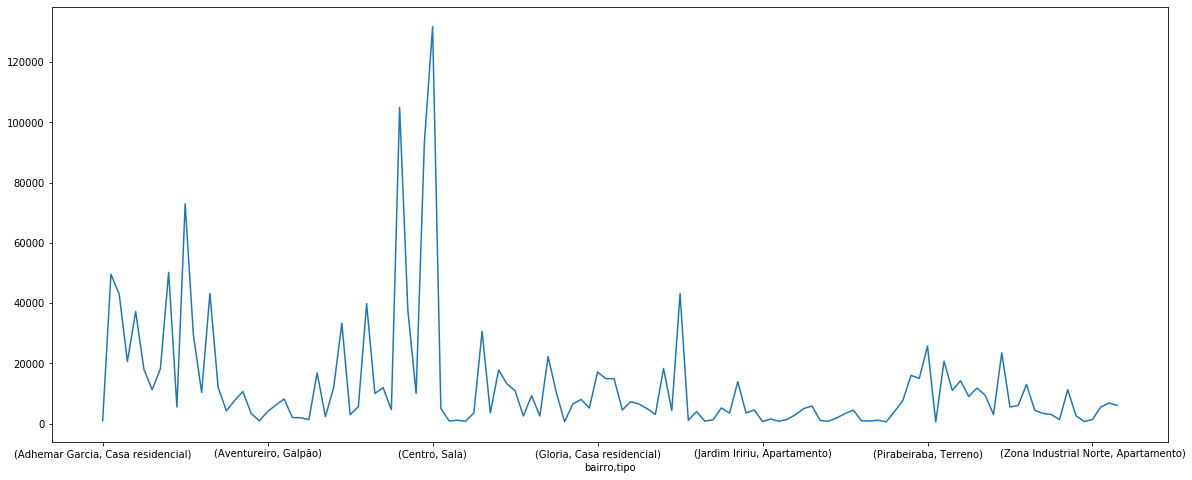

In [117]:
plt.figure(figsize=(20,8))
df.groupby(['bairro','tipo'])['valor'].sum().plot()

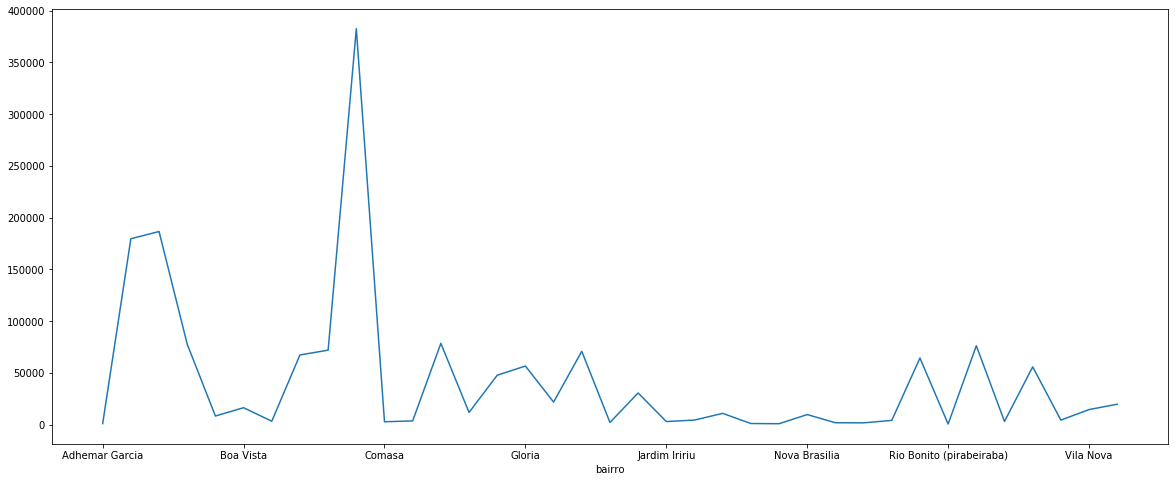

In [118]:
 plt.figure(figsize=(20,8))
df.groupby('bairro')['valor'].sum().plot()
       

In [11]:
r = requests.get('https://www.anagelocacao.com.br/Quero-alugar/imoveis/TipoImovel/91501930/Cidade/joinville/Quarto/2/currentpage/1')

In [3]:
soup = BeautifulSoup(r.content, 'html5lib')

In [4]:
listagem_imovel = soup.select('div[class*=listagem__imovel]')

In [5]:
len(listagem_imovel)

8

In [6]:

tipo

'Casa residencial'

'Saguacu'

In [8]:

valor

'5.000,00'

In [9]:

link

'tabFichaL/fic/1975694/ref/-Casa-residencial-Joinville-Saguacu-2-quarto'

In [10]:

imagem

'https://www.anagelocacao.com.br/indicadordeimoveis/imobiliarias/1930/fotos/medio480x360/1483501930/26455301930.jpg'

In [11]:
 ####   domitorios = current.select('div[class*=listagem__item-info]')[2].text
info

NameError: name 'info' is not defined

In [ ]:

info

In [ ]:

info